<center><h1><b>Au & Ag</b></h1></center>

En esta JupyterNotebook voy a analizar los valores del Oro (Au) y Plata (Ag) y ver si hay una relación entre sus subidas y bajadas. Para obtener estos datos emplearé la librería *yfinance*.

In [1]:
import pandas as pd
import yfinance as yf

Cargamos los datos del Oro y los guardaremos en un DataFrame llamado ``dfau``.


In [2]:
gold=yf.Ticker('GC=F')
dfau=gold.history(period='max')
dfau.reset_index(inplace=True)
dfau=dfau.iloc[:,0:6]
dfau.tail()

,Date,Open,High,Low,Close,Volume
6164,2025-03-27 00:00:00-04:00,3025.500000,3065.000000,3025.500000,3060.199951,124359
6165,2025-03-28 00:00:00-04:00,3069.699951,3094.899902,3066.800049,3086.500000,31206
6166,2025-03-31 00:00:00-04:00,3091.000000,3132.500000,3086.000000,3122.800049,3438
6167,2025-04-01 00:00:00-04:00,3129.699951,3149.500000,3104.000000,3118.899902,3438
6168,2025-04-02 00:00:00-04:00,3147.500000,3135.000000,3117.399902,3163.699951,65934


Análogamente, guardaremos los de la Plata en ``dfag``.

In [3]:
silver=yf.Ticker('SI=F')
dfag=silver.history(period='max')
dfag.reset_index(inplace=True)
dfag=dfag.iloc[:,0:6]
dfag.tail()

,Date,Open,High,Low,Close,Volume
6166,2025-03-27 00:00:00-04:00,34.896999,34.896999,34.896999,34.896999,1017
6167,2025-03-28 00:00:00-04:00,35.264999,35.264999,34.560001,34.644001,316
6168,2025-03-31 00:00:00-04:00,34.759998,35.000000,34.400002,34.457001,97
6169,2025-04-01 00:00:00-04:00,34.599998,34.665001,34.158001,34.158001,97
6170,2025-04-02 00:00:00-04:00,34.375000,34.830002,34.290001,34.775002,13789


Veamos ahora las gráficas por separado.

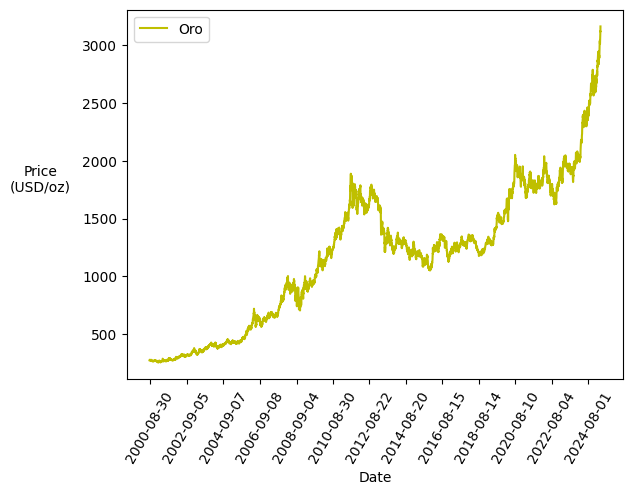

In [4]:
import matplotlib.pyplot as plt


plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

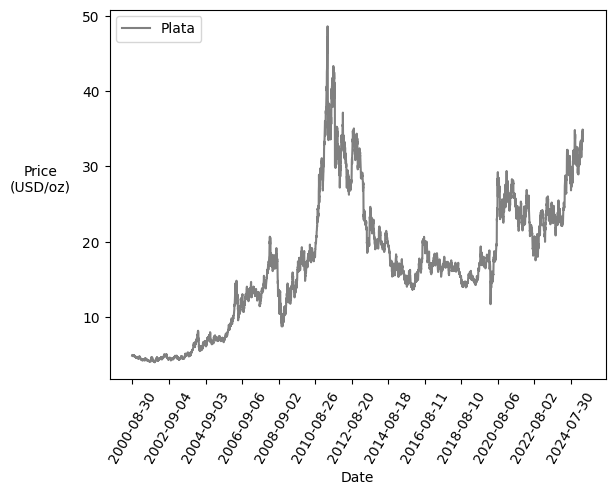

In [5]:
plt.plot('Date','Close',data=dfag,color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfag['Date'][::500],rotation=60)
plt.legend(loc='upper left')
plt.show()

A simple vista sí que parece que hay una dependencia entre estos metales, sin embargo, vamos a compararlos sobre la misma gráfica para que sea más cómodo observarlo. Ahora bien, existe el problema de que los valores de la Plata son mucho más pequeños que los del Oro, haciendo así que no sea posible compararlos, tal y como se ve en la siguiente gráfica.

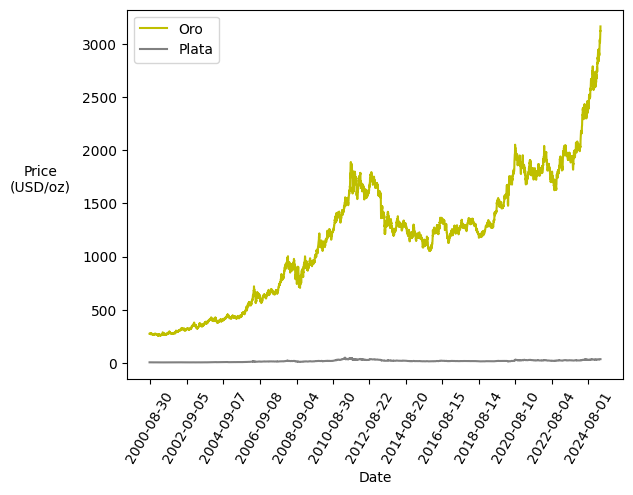

In [6]:
plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.plot('Date','Close',data=dfag,color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

Para solucionar esto vamos a "agrandar" la gráfica de la Plata; para ello obtendremos la media de los cocientes entre el valor del Oro y de la Plata. Sin embargo, tenemos un problema, nosotros queremos dividir el valor del Oro por el de la Plata en el **mismo** día, pero a partir de cierta fila, las que tienen el mismo índice, no se corresponden al mismo día; por ejemplo, las filas 100 tienen el mismo día pero las 259 ya no, tal y como vemos en la siguiente celda. Por lo tanto, esto nos daría algo de error en el cálculo, aunque ciertamente no va a ser muy grande ya que el precio de los metales tampoco fluctúa mucho de un día para otro.

In [7]:
print('Filas 100 iguales?',dfau.loc[100,'Date']==dfag.loc[100,'Date'])
print('Filas 259 iguales?',dfau.loc[259,'Date']==dfag.loc[259,'Date'])

Filas 100 iguales? True
Filas 259 iguales? False


Vamos a buscar las filas que están solamente en una de los dataframes para posteriormente eliminarlas y poder así realizar el cociente de una forma correcta.

In [8]:
j0=int(0)
k0=int(0)
for i,a in enumerate(dfau['Date']):
    for j in range(j0,len(dfag['Date'])):
        if a==dfag.loc[j,'Date']:
            k=j-i
            if k>k0:
                print(f'Todas las filas en el intervalo [{j0},{j-1}] de la columna "Date" del dataframe Plata no está en Oro.')
                k0=k
            j0=j+1
            break
        elif j==len(dfag['Date'])-1:
            print(f'La fila {i} de la columna "Date" del dataframe Oro no está en el de Plata.')
            k0=k0-1

Todas las filas en el intervalo [258,258] de la columna "Date" del dataframe Plata no está en Oro.
Todas las filas en el intervalo [1454,1454] de la columna "Date" del dataframe Plata no está en Oro.
La fila 1554 de la columna "Date" del dataframe Oro no está en el de Plata.
Todas las filas en el intervalo [1556,1556] de la columna "Date" del dataframe Plata no está en Oro.


In [9]:
dfau.drop(index=1554,inplace=True)
dfau.reset_index(drop=True,inplace=True)

dfag.drop(index=[258,1454,1556],inplace=True)
dfag.reset_index(drop=True,inplace=True)

Tras haberlas ajustado haremos una simple comprobación de que todo lo anterior se ha realizado correctamente.

In [10]:
(dfau.loc[:,'Date']==dfag.loc[:,'Date']).value_counts()

Date
True    6168
Name: count, dtype: int64

Ahora estamos en concidiones de hacer el cociente elemento a elemento y obtener así la media.

In [11]:
k=(dfau['Close']/dfag['Close']).mean()
k

68.70957999431891

Tomaremos pues esa constante para "agrandar" la gráfica de la Plata y obtener una comparación aproximada de ambas gráficas.

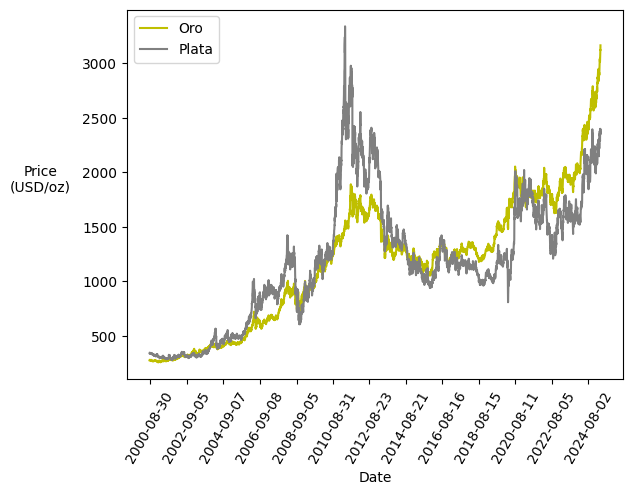

In [12]:
plt.plot('Date','Close',data=dfau,color='y',label='Oro')
plt.plot(dfag['Date'],k*dfag['Close'],color='grey',label='Plata')
plt.xlabel('Date')
plt.ylabel('Price\n(USD/oz)',rotation=360,labelpad=30)
plt.xticks(dfau['Date'][::500],rotation=60)
plt.legend()
plt.show()

Vemos que la Plata sigue claramente las tendencias del Oro, de hecho parece que incluso sube con algo más de pendiente entre los años 2006-2008 y 2010-2013. Falta ver cómo se comportará ante esta última gran subida del Oro.

---
<h1> Autor </h1>
CSSuanzes

2 de Abril de 2025
